In [1]:
#import sys
#!{sys.executable} -m pip install --upgrade c-lasso 
from classo import *
import zarr
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## Data 

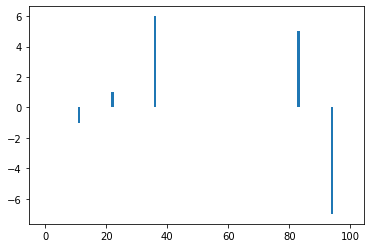

array([11, 22, 36, 83, 94])

In [2]:
m,d,d_nonzero,k,sigma =150,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=False,seed=None)
plt.bar(range(len(sol)),sol)
plt.show()

np.arange(len(sol))[sol !=0.]

In [3]:
print("lambdamax = ", max(abs(X.T.dot(y))))

lambdamax =  928.0690108881366


## Problems

In [4]:
problem = classo_problem(X,y,C=C)
problem.model_selection.PATH = True
problem.model_selection.CV = True
problem.model_selection.StabSel = True
problem.model_selection.LAMfixed = True

problem.formulation.w = np.array([2.]*40+ [1.]*(d-40))


problem1 = deepcopy(problem)
problem2 = deepcopy(problem)
problem3 = deepcopy(problem)

problem1.formulation.w = np.array([2.]*40+ [1.]*(d-40))
problem3.formulation.w = np.array([2.]*40+ [1.]*(d-40))


problem1.formulation.intercept = True
problem2.formulation.intercept = True

### Path 

In [5]:
param = problem1.model_selection.PATHparameters
param.numerical_method = ' '
param.n_active = 20
param.lambdas = np.linspace(1.,1e-3,50)

In [6]:
param = problem2.model_selection.PATHparameters
param.numerical_method = 'P-PDS'
param.n_active = 0
param.lambdas = np.linspace(1.,1e-1,50)

In [7]:
param = problem3.model_selection.PATHparameters
param.numerical_method = 'DR'
param.n_active = 0
param.lambdas = np.linspace(1.,1e-1,20)

### Cross validation 

In [8]:
param = problem1.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 5
param.oneSE = True
param.lambdas = np.linspace(1.,1e-3,80)

In [9]:
param = problem2.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 7
param.oneSE = False
param.lambdas = np.linspace(1.,1e-3,80)

In [10]:
param = problem3.model_selection.CVparameters
param.seed = 2
param.numerical_method = 'P-PDS'
param.Nsubset = 3
param.oneSE = True
param.lambdas = np.linspace(1.,1e-1,20)

### Stability Selection

In [11]:
param = problem1.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'first'
param.B = 50
param.q = 10
param.percent_nS = 0.5
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.7 
param.threshold_label = 0.2

In [12]:
param = problem2.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'max'
param.B = 70
param.q = 20
param.percent_nS = 0.8
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.5 
param.threshold_label = 0.2

In [13]:
param = problem3.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'lam'
param.B = 50
param.q = 1000
param.percent_nS = 0.4
param.lamin = 1.
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.8
param.threshold_label = 0.2

### Lambda fixed 

In [14]:
param = problem1.model_selection.LAMfixedparameters
param.numerical_method = 'P-PDS'
param.lam = 'theoretical'
param.true_lam = True

In [15]:
param = problem2.model_selection.LAMfixedparameters
param.numerical_method = 'DR'
param.lam = 0.1
param.true_lam = False

In [16]:
param = problem3.model_selection.LAMfixedparameters
param.numerical_method = ' '
param.lam = 0.
param.true_lam = True

## R1

In [17]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = False

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = P-PDS
     rescaled lam : True
     threshold = 0.135
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



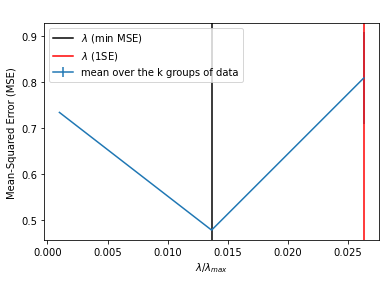

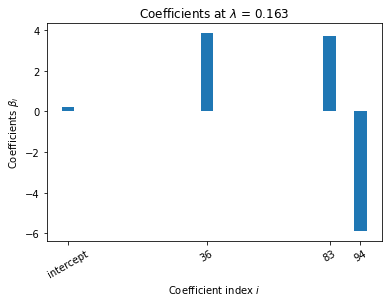

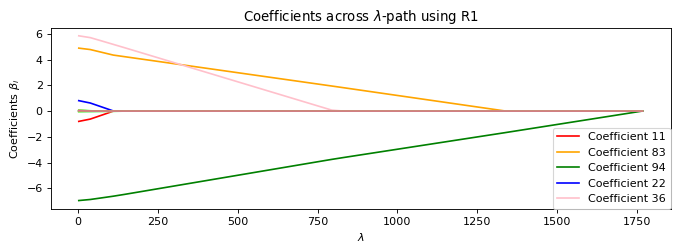

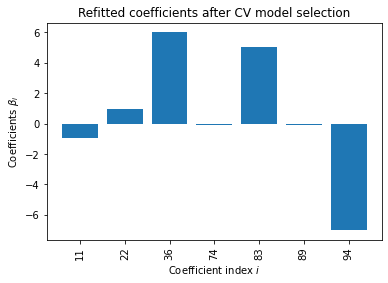

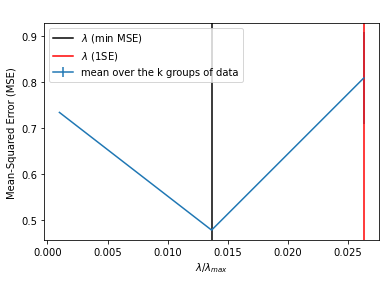

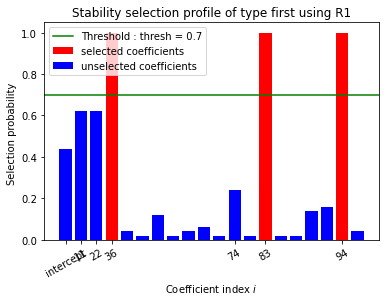

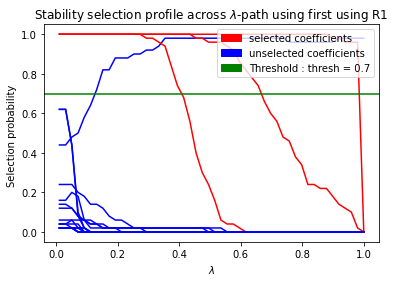

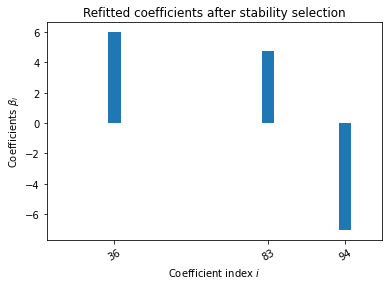


 LAMBDA FIXED : 
   Selected variables :  intercept    36    83    94    
   Running time :  0.008s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.067s

 CROSS VALIDATION : 
 Intercept : -0.04234123505618159
   Selected variables :  11    22    36    74    83    89    94    
   Running time :  0.347s

 STABILITY SELECTION : 
   Selected variables :  2    12    17    
   Running time :  0.399s

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.152
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : P-PDS
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     

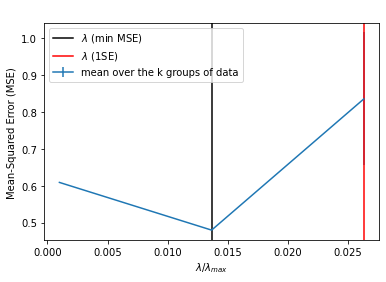

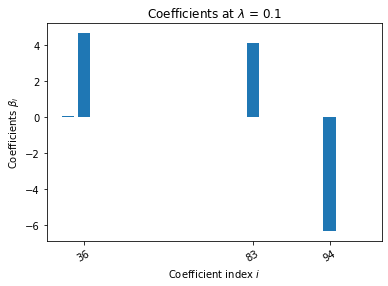

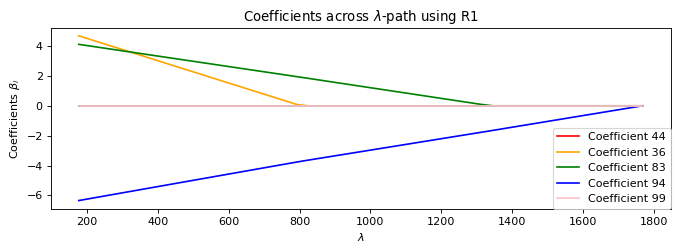

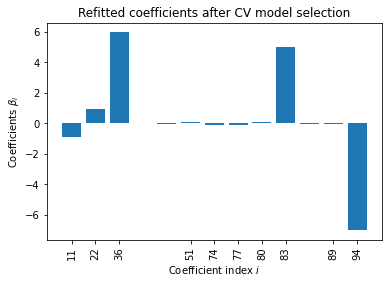

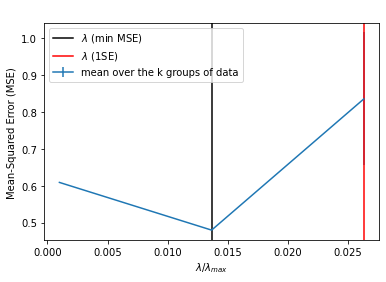

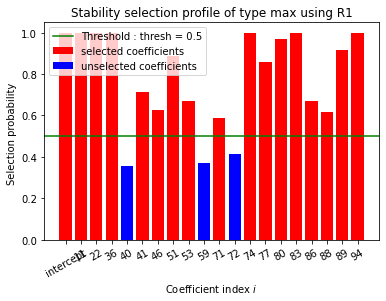

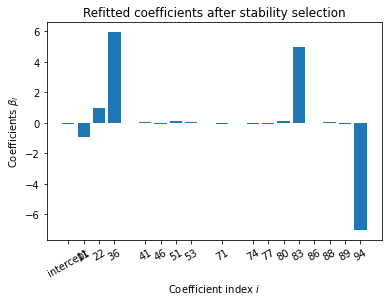


 LAMBDA FIXED : 
   Selected variables :  36    83    94    
   Running time :  0.031s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.176s

 CROSS VALIDATION : 
 Intercept : -0.08968965003808738
   Selected variables :  11    22    36    41    46    51    74    77    80    83    86    89    94    
   Running time :  0.674s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    1    2    4    5    6    7    9    11    12    13    14    15    16    17    18    
   Running time :  1.203s

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.255
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : P-PDS
     one-SE method : True
     Nsubset = 3
     lami

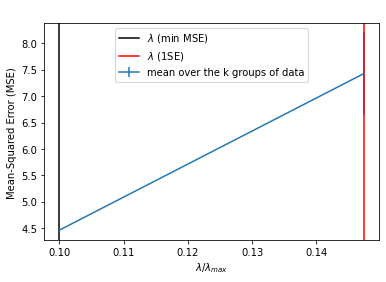

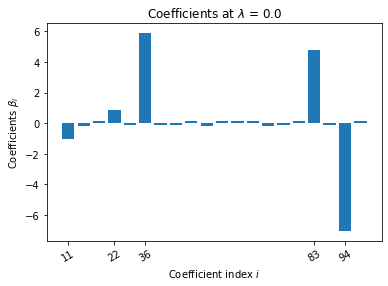

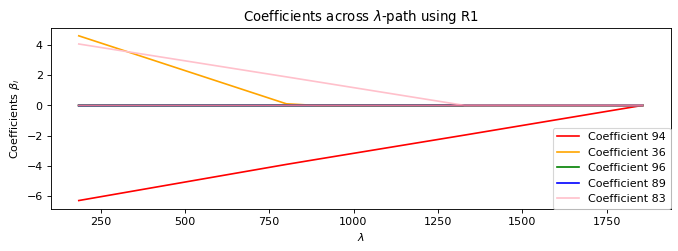

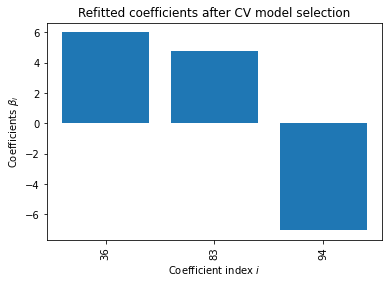

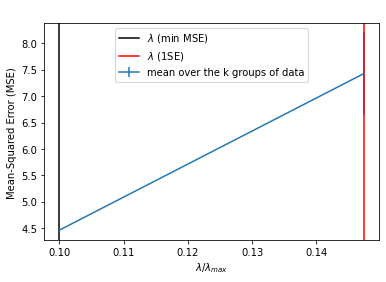

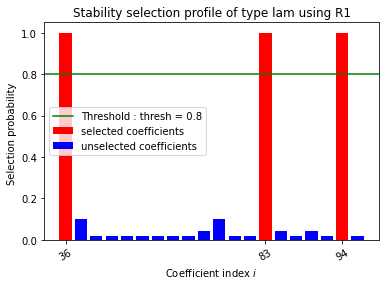

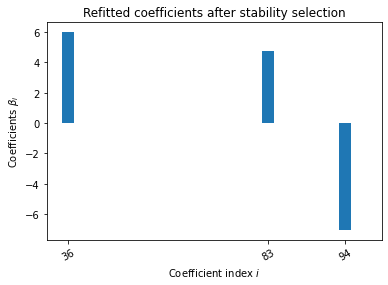


 LAMBDA FIXED : 
   Selected variables :  11    22    36    83    94    
   Running time :  0.001s

 PATH COMPUTATION : 
   Running time :  0.158s

 CROSS VALIDATION : 
   Selected variables :  36    83    94    
   Running time :  0.33s

 STABILITY SELECTION : 
   Selected variables :  0    13    18    
   Running time :  0.112s



In [18]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)

problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [19]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

problem1.formulation.intercept = False
problem2.formulation.intercept = False
problem3.formulation.intercept = False

## R2

In [20]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = False

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = P-PDS
     rescaled lam : True
     threshold = 0.135
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



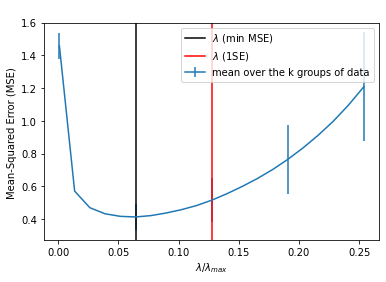

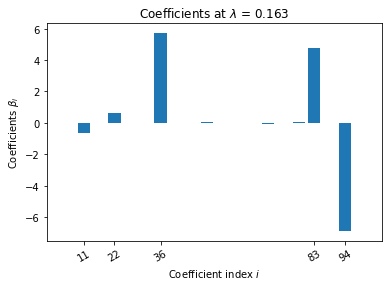

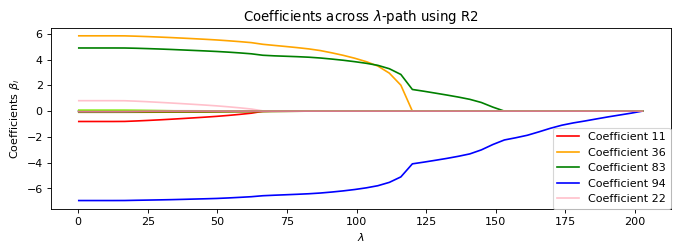

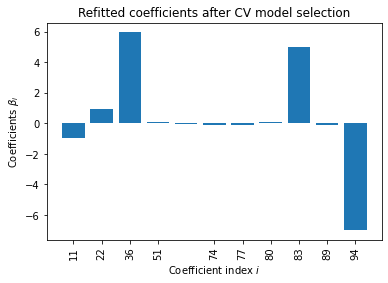

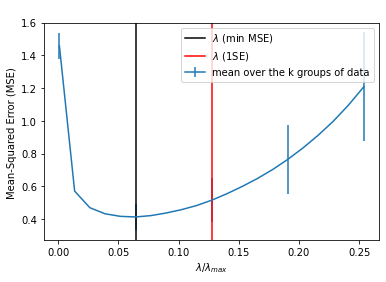

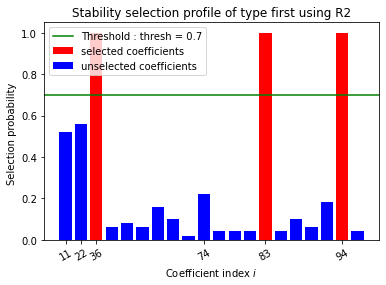

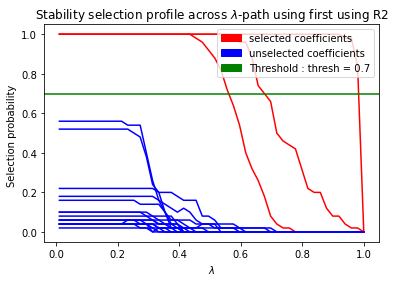

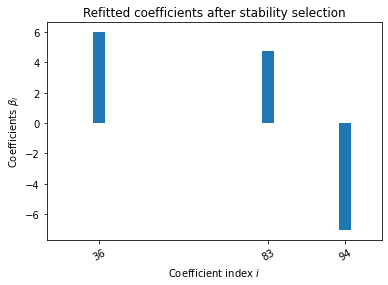


 LAMBDA FIXED : 
   Selected variables :  11    22    36    83    94    
   Running time :  0.031s

 PATH COMPUTATION : 
   Running time :  0.254s

 CROSS VALIDATION : 
   Selected variables :  11    22    36    51    59    74    77    80    83    89    94    
   Running time :  2.329s

 STABILITY SELECTION : 
   Selected variables :  2    13    18    
   Running time :  4.427s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.152
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : P-PDS
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_met

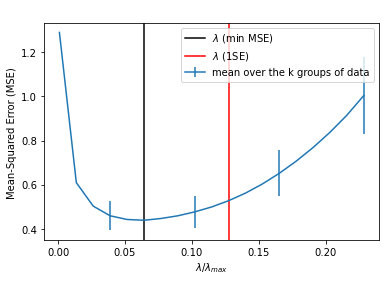

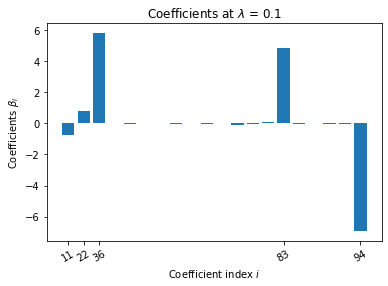

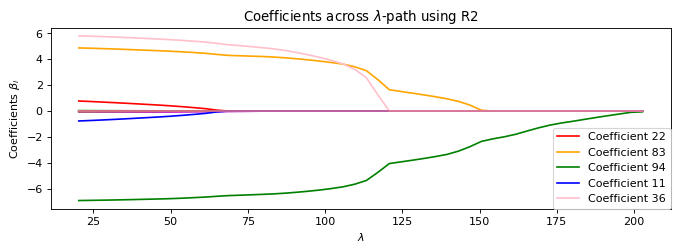

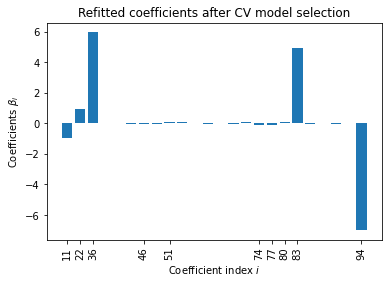

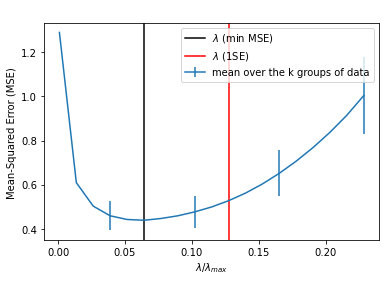

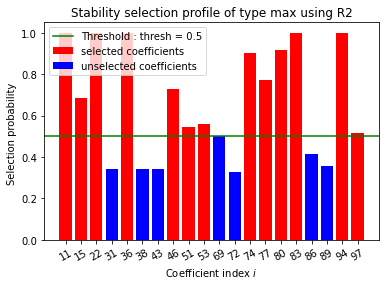

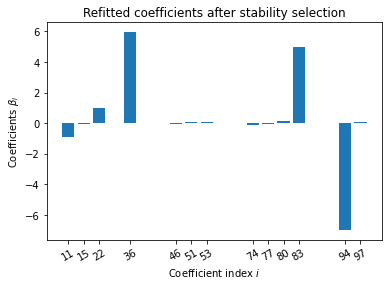


 LAMBDA FIXED : 
   Selected variables :  11    22    36    83    94    
   Running time :  0.202s

 PATH COMPUTATION : 
   Running time :  4.751s

 CROSS VALIDATION : 
   Selected variables :  11    22    36    40    41    43    46    49    51    53    55    59    69    71    72    74    77    80    83    86    88    89    93    94    
   Running time :  3.671s

 STABILITY SELECTION : 
   Selected variables :  0    1    2    4    7    8    9    12    13    14    15    18    19    
   Running time :  19.503s

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.255
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : P-PDS
     one-SE method : True
     Nsubset = 3
     lamin = 0.1
  

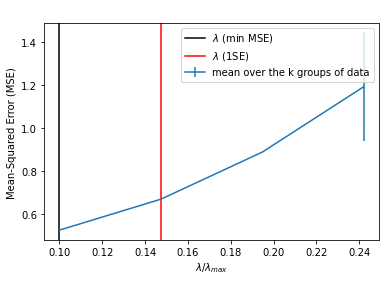

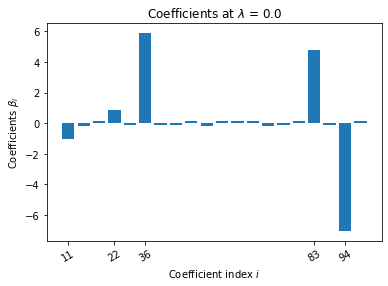

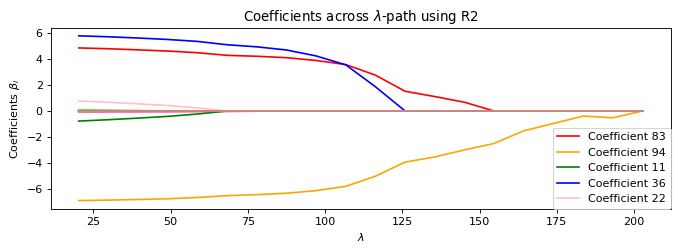

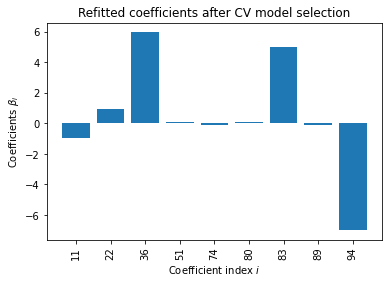

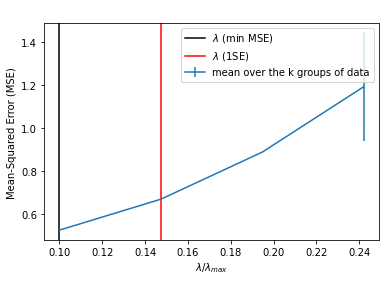

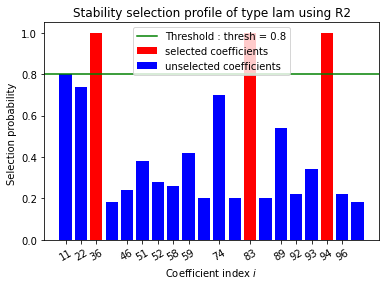

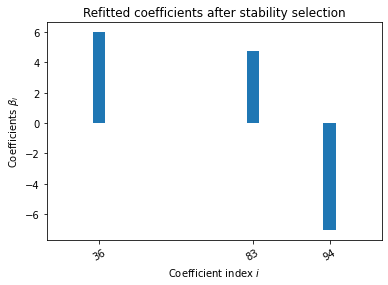


 LAMBDA FIXED : 
   Selected variables :  11    22    36    83    94    
   Running time :  0.01s

 PATH COMPUTATION : 
   Running time :  4.401s

 CROSS VALIDATION : 
   Selected variables :  11    22    36    51    74    80    83    89    94    
   Running time :  3.285s

 STABILITY SELECTION : 
   Selected variables :  2    12    17    
   Running time :  2.862s



In [21]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [22]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'


problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '

problem1.formulation.intercept = True
problem2.formulation.intercept = True
problem3.formulation.intercept = False

## R3

In [23]:
problem1.formulation.concomitant = True
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = False
problem3.formulation.classification = False

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.135
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



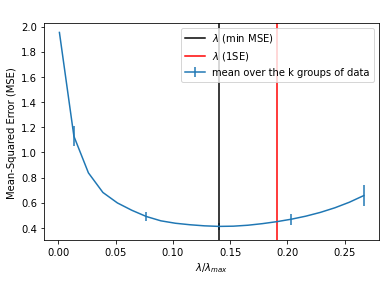

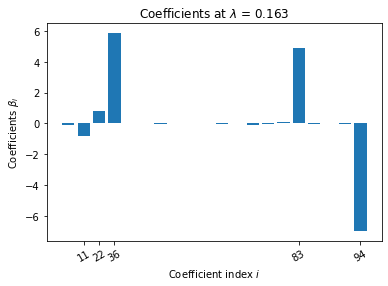

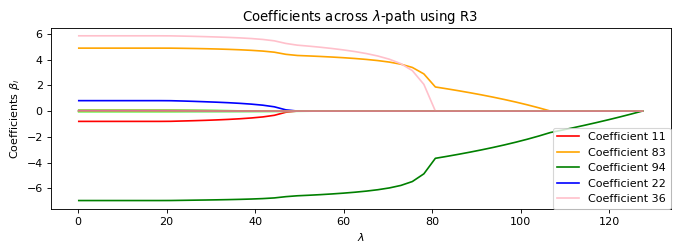

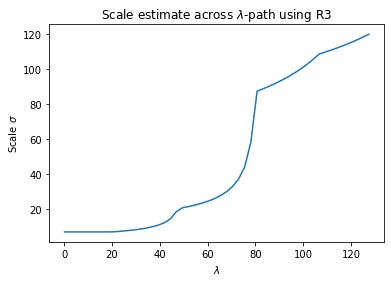

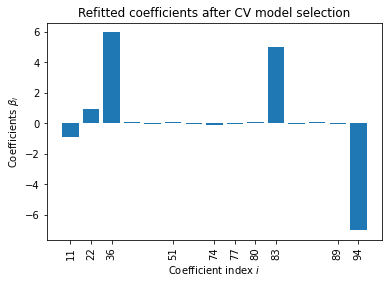

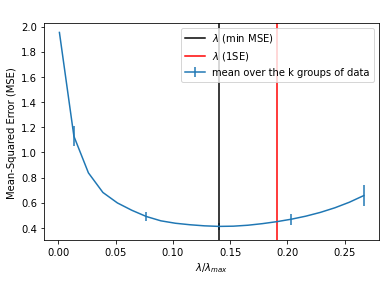

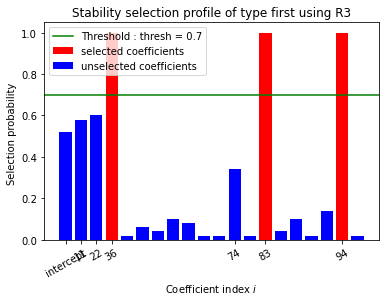

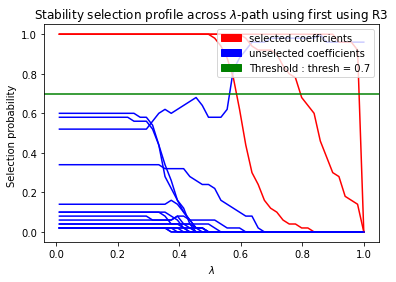

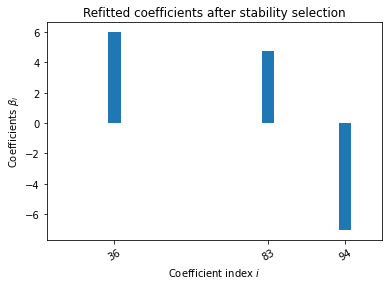


 LAMBDA FIXED : 
   Sigma  =  0.092
   Selected variables :  11    22    36    83    94    
   Running time :  0.01s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.019s

 CROSS VALIDATION : 
 Intercept : -0.09116266700561337
   Selected variables :  11    22    36    41    46    51    71    74    77    80    83    86    88    89    94    
   Running time :  0.463s

 STABILITY SELECTION : 
   Selected variables :  2    12    17    
   Running time :  0.44s

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.152
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STAB

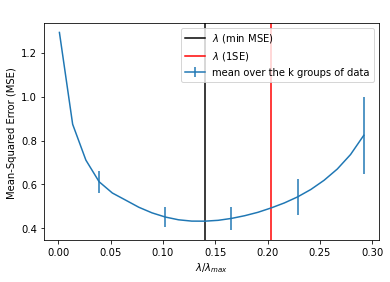

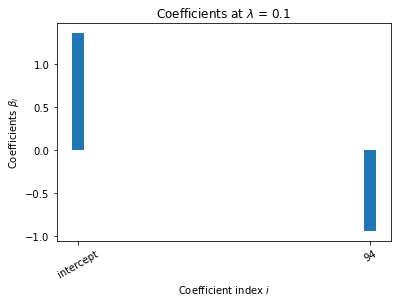

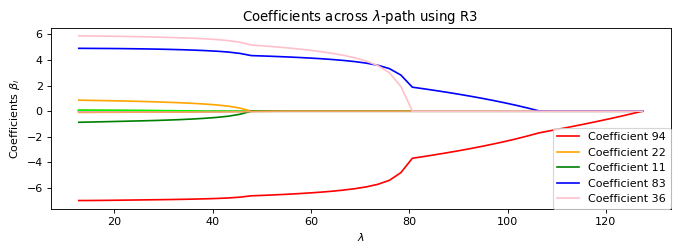

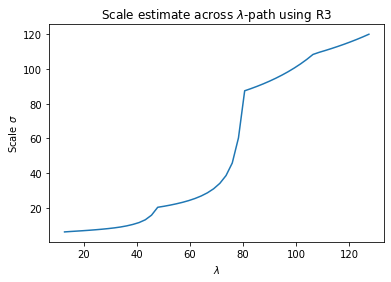

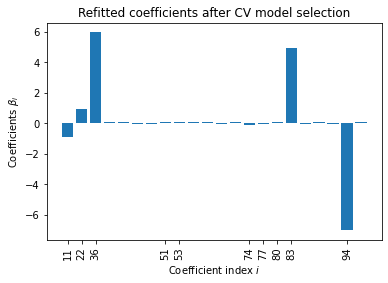

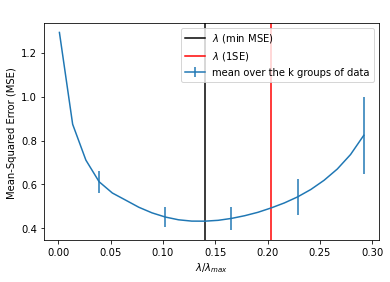

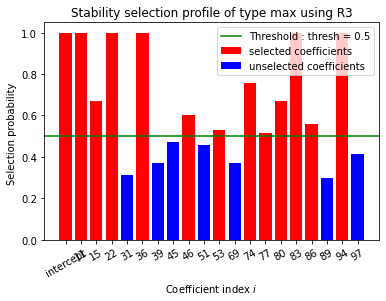

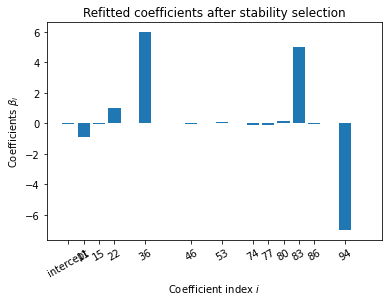


 LAMBDA FIXED : 
   Sigma  =  14.983
   Selected variables :  intercept    94    
   Running time :  2.418s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.024s

 CROSS VALIDATION : 
 Intercept : -0.12048063220811656
   Selected variables :  11    22    36    40    41    46    49    51    53    55    69    71    72    74    77    80    83    86    88    89    94    98    
   Running time :  0.55s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    1    2    4    7    9    11    12    13    14    15    17    
   Running time :  6.147s

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.255
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : 

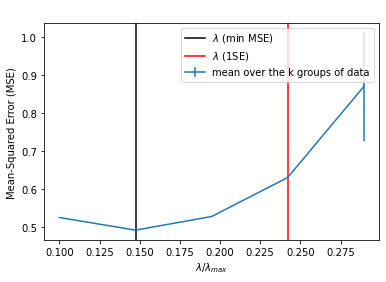

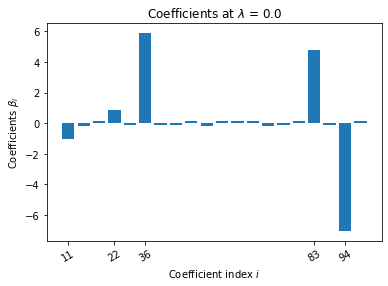

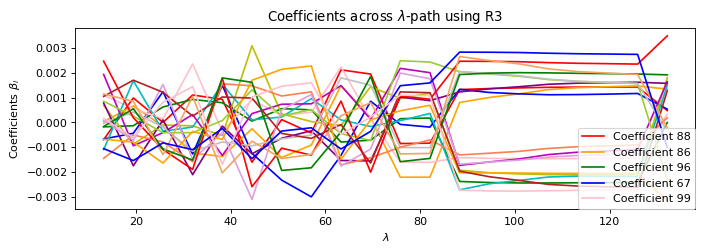

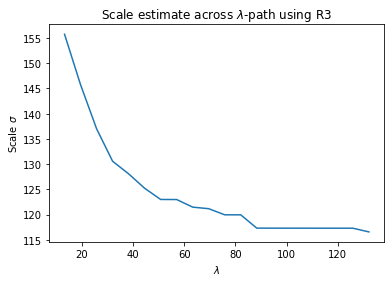

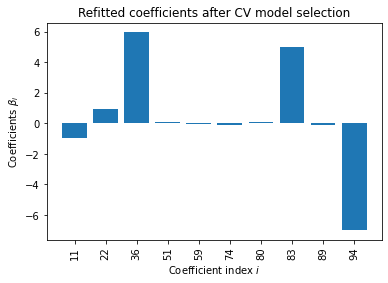

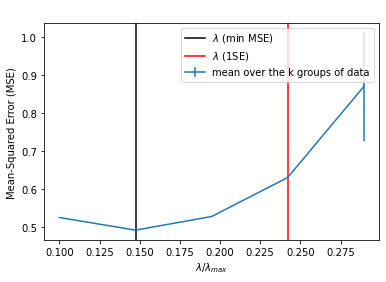

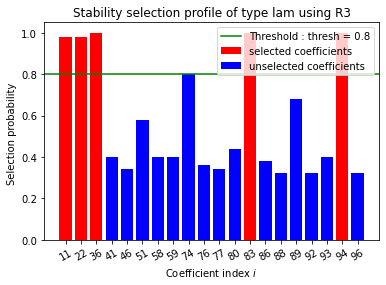

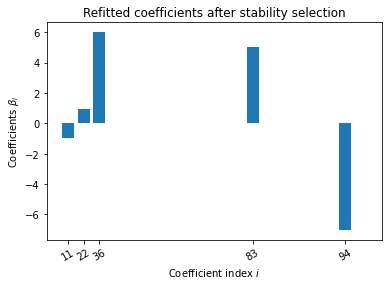


 LAMBDA FIXED : 
   Sigma  =  0.057
   Selected variables :  11    22    36    83    94    
   Running time :  0.001s

 PATH COMPUTATION : 
   Running time :  12.947s

 CROSS VALIDATION : 
   Selected variables :  11    22    36    51    59    74    80    83    89    94    
   Running time :  0.077s

 STABILITY SELECTION : 
   Selected variables :  0    1    2    12    18    
   Running time :  0.517s



In [24]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [25]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '

problem1.formulation.intercept = False
problem2.formulation.intercept = False
problem3.formulation.intercept = False

## R4

In [26]:
problem1.formulation.concomitant = True
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = True
problem3.formulation.classification = False

In [ ]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)


too many labels, there for the labels ['0'] have been deleted


## Reset the numerical methods 

In [ ]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## C1

In [ ]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = True
problem1.data.y = np.sign(problem1.data.y)

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = True
problem2.data.y = np.sign(problem2.data.y)

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = True
problem3.data.y = np.sign(problem3.data.y)

In [ ]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [ ]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## C2

In [ ]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = True

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = True

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = True

In [ ]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)